### CS/ECE/ISyE 524 &mdash; Introduction to Optimization &mdash; Spring 2021 ###

### Final Course Project: Due 5/2/21, 12:05pm

# Single-Period Portfolio Optimization with More Real-world Constraints #

####  Binhao Chen (bchen276@wisc.edu),  Jingde Wan (wan38@wisc.edu)

*****

*****

### Table of Contents

1. [Introduction](#1.-Introduction)

1. [Mathematical Model](#2.-Mathematical-Model)
  1. [Modeling Assumptions](#2.-Modeling-Assumptions)
  1. [Decision Variables](#2.-Mathematical-model)
  1. [Constraints](#2.-Mathematical-model)
    1. [Diversification Constraints](#2.-Mathematical-model)
    1. [Shortselling Constraints](#2.-Mathematical-model)
    1. [Shortfall Risk Constraints](#2.-Mathematical-model)
    1. [Variance](#2.-Mathematical-model)
    1. [Budget Constraints](#2.-Mathematical-model)
  1. [Objective Function](#2.-Mathematical-model)
    1. [Linear Transaction Costs](#2.-Mathematical-model)
    1. [Fixed Transaction Costs](#2.-Mathematical-model)
  1. [Standard Form](#2.-Mathematical-model)
    1. [Maximizing the Expected End Wealth](#2.-Mathematical-model)
    1. [Minimizing the Total Transaction Costs](#2.-Mathematical-model)
    
1. [Solution](#3.-Solution)
  1. [Data Processing and Basic Visualization](#3.-Solution)
  1. [Model without Considering the Fixed but Linear Cost and Other Common Constraints](#3.-Solution)
  1. [Model with Considering the Fixed + Linear Cost, and Other Common Constraints](#3.-Solution)
  1. [Model with Considering Minimizing the Total Transaction Costs (Objective Function)](#3.-Solution)
  
1. [Results and Discussion](#4.-Results-and-discussion)
  1. [Results and Discussion - First Model](#4.-Results-and-discussion)
  1. [Results and Discussion - Second Model](#4.-Results-and-discussion)
  1. [Results and Discussion - Third Model](#4.-Results-and-discussion)
  
1. [Conclusion](#5.-Conclusion)

1. [Referece](#6.-Referece)

*****

*****

## 1. Introduction ##

The main features of this project is to establish and solve a more practical portfolio optimization problem given more real-world constraints basically under the framework of Markowitz's Modern Portfolio Theory.

In the portfolio optimization problem we discussed in the lecture of CS524, we only consider a simple case of Markowitz's Modern Portfolio Theory which requires the distribution of the return of each asset is known. And we obtain the covariance matrix for these assets by calculating covariance of each pair of assets. Eventually we make trade-off between maximizing expected return ($\mu$) and minimizing variance/risk ($\Sigma$) and get optimal weights  ($x_{i}$) for each asset:

\begin{equation*}
\begin{aligned}
& \underset{x}{\text{minimize}}
& & -x^{T}\mu + \lambda x^{T}\Sigma x \\
& \text{subject to}
& & x_{1}+x_{2}+\cdots+x_{n}=1 \\
& & & x_{i} \geq 0
\end{aligned}
\end{equation*}

In this project, we apply optimization techniques to customize the investment portfolio with multiple real-world features and constraints, including linear/fixed transaction costs, and then to maximize the expected wealth at the end of current trading period under Markowitz's Modern Portfolio Theory framwork. We consider a more complicated model based on MPT but involving more constraints including variance constraints, shortfall risk constraints, shortselling constraints, diversification constraints, as well as the budget constraints, etc. We modeled the transaction cost as the combination of linear transaction cost and fixed transaction cost, both are varied depending on the operation (buying or selling). When we eventually formulated our optimization model, we considered three optimization problems: expected end wealth maximization problem with linear but not fixed transaction cost, expected end wealth maximization problem with linear and fixed transaction cost, and finally a minimization problem with respect to the total transaction cost.

The original data used in our project is the closing prices of 15 stocks whose market capitalization are top 15 on `NASDAQ` from all trasaction days in the year 2020. We access the data directly from `Yahoo! Finance`, `New York Exchange`, and `NASDAQ`. These closing price data was processed to geneate the daily stock return which will be used in this project. We assume that we are currently holding these 15 stocks with equal amout of money (\$100) and we hope to adjust the positions of each stock in the portfolio after solving the optimization problems.


Most of the ideas we used in this project are motivated by these wonderful papers:

**Reference:**

Lobo, M. S., Fazel, M., & Boyd, S. (2007). Portfolio Optimization with Linear and Fixed Transaction Costs. *Annals of Operations Research*, 152(1), 341-365.

Skaf, J., & Boyd, S. (2009). Multi-period portfolio optimization with constraints and transaction costs. *Working Manuscript*.



## 2. Mathematical Model ##

We discuss the optimization model that we used for the portfolio selection problem in this section. We consider an investment portfolio that consists of holdings in part or all of a set of different stocks. And this portfolio is to be revised after performing the optimization with respect to maximizing the expected return. We also show how to transfer a set of real-world constraints on the portfolio to mathematical languages. For the sake of convenience, we restricted the investment targets to be listed stocks in U.S. makket, so that we can have public access to the historical data. And we suppose there are n stocks in total.



### 2.1 Modeling Assumptions ###

$\bullet \quad$ We assume that there is no limit to the amount that can be longed or shorted for all investment objects (stocks), i.e the supply and demand for every stock is abundant in the market. This is because in this case, the original portfolio is irrelevant, **except for its total value**. We can make whatever transactions are necessary to arrive at the optimal portfolio.

$\bullet \quad$ We assume that each stock can be modeled as a random variable with an expected return $\mu_i$ and a standard deviation $\sigma_i$, here the standard deviation is a measure of uncertainty.

$\bullet \quad$ We assume that the returns of each stock, representing by the random vector $a$, have a jointly Gaussian distribution, $a \sim \mathcal{N}(\bar{a}, \sigma_a) $, where $\bar{a} = \mathbb{E}(a), \sigma_a = \mathbb{E}((a - \bar{a})(a - \bar{a})^T)$, and we assume that we can use 1-year histocial data to infer its expected value and standard deviation.

$\bullet \quad$ We assume that the initial holdings in each asset are $w = (w_1, . . . , w_n)$ with $w_i = \$100$ for $i \in \{1, 2, ..., n \}$. The total current wealth is then $\mathbf{1}^T w$, where $\mathbf1$ is a vector with all entries equal to one.

### 2.2 Decision Variables ###

Under normal circumstances, the brokerage fees for the two operations of buying（long）and selling (short) are likely to be different, so here we introduce 2n decision variables, which is twice the quantity of investable targets, to seperately indicating the amount transacted in each stock.

$\bullet \quad$ The dollar amount longed in each stock is specified by $x^+ = (x_1^+, . . . , x_n^+) \geq \mathbb{0}^n \in \mathbb{R}^n$

$\bullet \quad$ The dollar amount shorted in each stock is specified by $x^- = (x_1^-, . . . , x_n^-) \geq \mathbb{0}^n \in \mathbb{R}^n$ 

$\bullet \quad$ Therefore, the adjustment on each stock the the portfolio is $x = x^+ - x^- = (x_1^+ - x_1^-, . . . , x_n^+ - x_n^-) \in \mathbb{R}^n$

### 2.3 Constraints ###

#### 2.3.1 Diversification Constraints ####

Diversification of investment targets is one of the most common ways to hedge risks, it is the practice of spreading the investments around so that the exposure to any one type or group of asset is controlled. This practice is designed to help reduce the volatility of the portfolio over time.

$\bullet \quad$ The simplest diversification constraints limit the amount invested in each asset $i$ to a maximum of $p_i$, 
$$
i.e. \quad w_{i}+x_{i} \leq p_{i}, \quad i=1, \ldots, n
$$

$\bullet \quad$ Alternatively, we may also choose to limit the proportions of total wealth (post-adjustment) held in each stock saparetely, 
$$
i.e. \quad w_{i}+x_{i} \leq \gamma_i \mathbf{1}^T (w + x), \quad i=1, \ldots, n
$$ 
where $\gamma_i$ is the $i$th element of the vector ($\gamma$) of supposed limited fractions of each stock.

$\bullet \quad$ Similarly, we may consider a more sophisticated way to achieve the goal of diversified investment. The diversification constraints can be expressed by limiting a certain amount of the total wealth that can be concentrated in any small group of stocks, for example, some investors may prefer some industries like Technology or Finance.
$$
i.e. \quad \sum_{i=1}^{r}(w+x)_{[i]} \leq \gamma \mathbf{1}^{T}(w+x) .
$$
the left-hand side represents the maximum amount of money that held in any subset of $r$ stocks.

#### 2.3.2 Shortselling Constraints ####

Short selling is an investment or trading strategy that speculates on the decline in a stock or other asset's price. In short selling, a position is opened by borrowing shares of a stock or other asset that the investor believes will decrease in value. The investor then sells these borrowed shares to buyers willing to pay the market price. Before the borrowed shares must be returned, the portfolio manager is betting that the price will continue to decline and they can purchase them at a lower cost. Some investors or portfolio managers may use it as a hedge against the downside risk of a long position in the same stock or a related one.


$\bullet \quad$ The simplest Shortselling constraints is to introduce individual bounds $s_i$ on the maximum of shortselling allowed on asset $i$,
$$
i.e. \quad w_{i}+x_{i} \geq -s_{i}, \quad i=1, \ldots, n
$$
here $s_i$ is a credit line, if the short selling is prohibited by financial regulatory agency, the $s_i$ should be set to 0.

$\bullet \quad$ Alternatively, we may also set a universal bound $S$ on the total shortselling permitted in the whole portfolio,
$$
i.e. \quad \sum_{i=1}^{n} max\{-(w_i+x_i), 0\} \leq S,
$$

This can also be rewritten as a set of linear constraints by introducing an auxiliary variable $t \in \mathbb{R}^n$,
$$
t_i \geq -(w_i + x_i); \\
t_i \geq 0; i = 1, 2, ..., n \\
\mathbf{1}^Tt \leq S.
$$

#### 2.3.3 Shortfall Risk Constraints ####

A shortfall applies to any situation where the level of funds required to meet an obligation is not available. Temporary shortfalls often occur in response to an unexpected event. Controlling the risk of shortfall within a reasonable range is to withdraw the investment amount in time when the market is declining or the black swan event occurs, so as to avoid further unnecessary losses.

$\bullet \quad$ Let $W$ be the end of current single-period wealth, we need to impose the requirement that the end of period wealth $W$ must be larger than some lower bound, say $W_{low}$ with a confidence level that exceeding $\eta$, where $W_{low}$ and $\eta$ are two parameteres can be adjusted by the portfolio manager. Here we temporarily set $\eta$ to be 0.8,

$$
i.e \quad \boldsymbol{\operatorname {Prob}}\left(W \geq W_{\mathrm{low}}\right) \geq \eta
$$

$\bullet \quad$ Given the end of period wealth is a Gaussian random variable, $W = a^T(w+x) \sim \mathbb{N}(\mu, \sigma)$, the above constraint can also be rewirtten as 
$$
\text { Prob }\left(\frac{W-\mu}{\sigma} \leq \frac{W_{\text {low }}-\mu}{\sigma}\right) \leq 1-\eta
$$
Since $(W-\mu) / \sigma$ is a zero mean, unit variance Gaussian variable, the probability above is simply $\Phi\left(\left(W_{\text {low }}-\mu\right) / \sigma\right)$, where
$$
\Phi(z)=\frac{1}{\sqrt{2 \pi}} \int_{-\infty}^{z} e^{-t^{2} / 2} dt
$$
is the cumulative distribution function of a zero mean, unit variance Gaussian random variable. Thus, the above probability constraint can be expressed as
$$
\frac{W_{\text {low }}-\mu}{\sigma} \leq \Phi^{-1}(1-\eta)
$$
or, using $\Phi^{-1}(1-\eta)=-\Phi^{-1}(\eta)$,
$$
\mu-W_{\text {low }} \geq \Phi^{-1}(\eta) \sigma
$$

$\bullet \quad$ Besides, we have $\bar{a} = \mathbb{E}(a), \Sigma = \mathbb{E}((a - \bar{a})(a - \bar{a})^T)$ from our initial assumptions, we may infer that $\mu=\bar{a}^{T}(w+x) \text { and } \sigma^{2}=(w+x)^{T} \Sigma (w+x)$,

$$
\quad \boldsymbol{\operatorname {Prob}}\left(W \geq W_{\mathrm{low}}\right) \geq \eta \quad \Leftrightarrow
\Phi^{-1}(\eta)\left\|\Sigma^{1 / 2}(w+x)\right\| \leq \bar{a}^{T}(w+x)-W_{\text {low }}
$$

#### 2.3.4 Variance Constraints ####

The Modern Portfolio Theory (MPT), assumes that investors are risk-averse; for a given level of expected return, investors will always prefer the less risky portfolio. Under the framework, we prefer a overall portfolio with lower variance as it is a mathematical indicator about the level of overall risk of the portfolio.

$\bullet \quad$ The standard deviation of the end of period wealth $W$ can be constrained to be less than $\sigma_{max}$ by the (convex) quadratic inequality 

$$
(w+x)^T \Sigma (w+x) \leq \sigma_{max}^2,
$$
which is equivalent to $
\left\|\Sigma^{1 / 2}(w+x)\right\| \leq \sigma_{\max }
$, where $\|\cdot\|$ is the Euclidean or $\ell_{2}$ norm, and $\Sigma^{1 / 2}$ is the (symmetric) matrix square root of $\Sigma$.

#### 2.3.5 Budget Constraints ####

$\bullet \quad$ After the adjustment transactions, the adjusted portfolio is $w+x$, but it is obvious that every transaction on current position (current holding in each listed stock) incurs fees, which means no matter what kinds of transactions are made, the total amount of the wealth of the portfolio (post-transaction) must be less than the pre-transaction value. We also need to constraint it in our model:
$$
\mathbf{1}^T x + \phi(x) \leq \mathbb{0},
$$
Here $\phi$ is the function of total transaction cost of this adjustment $(x)$, $x = x^+ - x^- = (x_1^+ - x_1^-, . . . , x_n^+ - x_n^-).$

### 2.4 Objective Function ###

Generally the objective of a portfolio optimization problem is to maximize the expected wealth at the end of current period subject to some constraints like what we discussed above. Meanwhile, we may also consider a related problem of minimizing the total transaction costs subject to portfolio constraints. Among all possible transactions that result in portfolios achieving a given expected return and meeting the other portfolio constraints, we would like to perform those transactions that incur the smallest total cost. Before writing down the compact form of the optimization problem, we would like to introduce two slight different way to model the transaction costs, which are linear and fixed.

#### 2.4.1 Linear Transaction Costs ###

Transaction costs are expenses incurred when buying or selling a stock. In a financial sense, transaction costs include brokers' commissions and spreads, which are the differences between the price the dealer paid for a stock or security and the price the buyer pays.

Here transaction costs can be used to model many fees for financial trading such as brokerage fees, bid-ask spreads, and taxes. In this project, we only consider the commissions fee charged by the brokers.

$\bullet \quad$ We assume that the transaction costs are separated with respect to different investment target, i.e. different stocks in our planned list. We may introduce a new function $\phi(x)$ to represent the sum of the transaction costs associated with each transaction, $\phi(x) = \sum_{i = 1}^{n} \phi_i(x_i)$, where $\phi_i$ represents the transaction cost function for the stock i.

$\bullet \quad$ To better reflect the realistic situation with a linear form, the costs for each transaction should be proportional to the amount traded, we have introduced the 2n variables we will be used for the optimization model, here wo can also express the transaction costs function as:

$$
\phi_i = \alpha_i^+ x_i^+ + \alpha_i^- x_i^-,
$$ 
where $\alpha_i^+$ and $\alpha_i^-$ are the cost rates associated with buying (longing) and selling (shorting) the $i$th stock. If there is no transaction incur, then the cost will be 0.

#### 2.4.2 Fixed Transaction Costs ###

However, sometimes the brokers may require a basis fee in addition to the proportional fee once the transaction incurs, a fixed charge for any nonzero trade is common, We consider a model that includes fixed plus linear costs:

The fixed-plus-linear transaction costs function is given by
$$
\phi_{i}\left(x_{i}\right)=\left\{\begin{array}{ll}
0, & x_{i}=0 \\
\beta_{i}^{+}+\alpha_{i}^{+} x_{i}, & x_{i} \in \{x_1^+, ..., x_n^+\} \\
\beta_{i}^{-}+\alpha_{i}^{-} x_{i},& x_{i} \in \{x_1^-, ..., x_n^-\} .
\end{array}\right.
$$
where $\beta_{i}^{+}$ and $\beta_{i}^{-}$ be the fixed costs associated with buying and selling asset $i$.

### 2.5 Standard Form ###

With some obvious assumptions $(\bar{a} > 0, \phi \geq 0)$, we would like to solve an expected wealth maximization problem with all the constraints we described above. We summarize the portfolio optimization problem as:

$$
\begin{array}{ll}
\underset{x}{\text{maximize}} & \bar{a}^{T}(w+x) \\
\text { subject to } 
& w+x \in \mathcal{F} \\
& \sum_{i=1}^{r}(w+x)_{[i]} \leq \gamma \mathbf{1}^{T}(w+x) \\
& \sum_{i=1}^{n} max\{-(w_i+x_i), 0\} \leq S \\
& \Phi^{-1}(\eta)\left\|\Sigma^{1 / 2}(w+x)\right\| \leq \bar{a}^{T}(w+x)-W_{\text {low }} \\
& (w+x)^T \Sigma (w+x) \leq \sigma_{max}^2 \\
& \mathbf{1}^T x + \phi(x) \leq \mathbb{0} \\
\end{array}
$$

where
$$
\bar{a} \in \mathbf{R}^{n} \qquad \text{is the vector of expected returns on each asset,}
$$

$$
\sigma_a = \mathbb{E}((a - \bar{a})(a - \bar{a})^T) \qquad \text{is the variance of} \quad \bar{a}
$$

$$
S \in \mathbf{R} \qquad \text{is upper bound of the total shortselling permitted}
$$

$$
\Phi(z)=\frac{1}{\sqrt{2 \pi}} \int_{-\infty}^{z} e^{-t^{2} / 2} dt \qquad \text{is the cumulative distribution function (CDF) of the standard normal distribution}
$$

$$
w \in \mathbf{R}^{n} \qquad \text{is the vector of current holdings in each asset,}
$$

$$
x = x^+ - x^- = (x_1^+ - x_1^-, . . . , x_n^+ - x_n^-) \in \mathbf{R}^{n} \qquad \text{is the vector of amounts transacted in each asset,}
$$

$$
\phi: \mathbf{R}^{n} \rightarrow \mathbf{R} \qquad \text{is the transaction costs function,}
$$  

$$
\mathcal{F} \subseteq \mathbf{R}^{n} \qquad \text{is the set of feasible portfolios.}
$$ 


<br/><br/>

Similarly, we may formulate another related optimization problem, which minimize the total transaction costs subject to portfolio constraints, but it also has a desired lower bound on the expected return at the end of current period. We summarize it as follows:

$$
\begin{array}{ll}
\underset{x}{\text{minimize}} & \phi(x) := \sum_{i = 1}^{n} \phi_i(x_i) \\
\text { subject to } 
& \bar{a}^{T}(w+x) \geq r_{min} \\
& w+x \in \mathcal{F} \\
& \sum_{i=1}^{r}(w+x)_{[i]} \leq \gamma \mathbf{1}^{T}(w+x) \\
& \sum_{i=1}^{n} max\{-(w_i+x_i), 0\} \leq S \\
& \Phi^{-1}(\eta)\left\|\Sigma^{1 / 2}(w+x)\right\| \leq \bar{a}^{T}(w+x)-W_{\text {low }} \\
& (w+x)^T \Sigma (w+x) \leq \sigma_{max}^2 \\
\end{array}
$$

where
$$
r_{min} \in \mathbf{R} \qquad \text{is the lower bound of expected returns on overall portfolio.}
$$
The other notations are the same as previous problem.

## 3. Solution ##

### 3.1 Data Processing and Basic Visualization ###

We are currently holding 10 stocks with the highest market capitalization on `NASDAQ` which are "AAPL", "MSFT", "AMZN", "GOOGL", "FB", "TCEHY", "TSLA", "BRK-B", "BABA", "V". We have 1,000,000 dollars in total to invest and each stock is invested equally with 100,000 dollars now. We want to develop a single-period portfolio management strategy to adjust current positions in each stocks. Based on Markowitz's Modern Portfolio Theory, each stock can be modeled as a random variable (RV) with an expected daily return $\mu_{i}$ and a standard deviation $\sigma_{i}$. We assume all stock returns have normal distributions. The daily stock return can be expressed by

$$ \text{Stock return of day i} = [\frac{\text{Closing Price}_{day_{i}}-\text{Closing Price}_{day_{i-1}}}{\text{Closing Price}_{day_{i-1}}}] \times 100$$

which is considered as the random variable and can be calculated from all trasaction days in the year 2020. The expected stock return and covariance matrix is generated based on daily return of each stock. Here we express the covariance matrix and mean vector for the stock returns below.

In [1]:
using CSV, DataFrames, Statistics

# We choose 15 stocks from the listed companies in U.S. market (NASDAQ & NYSE)
# We directly applied their common abbreviations in fininacial markets.
stocks = ["AAPL", "MSFT", "AMZN", "GOOGL", "FB", "TCEHY", "TSLA", 
            "BRK-B", "BABA", "V", "JPM", "TMC", "JNJ", "BAC", "WMT"]

# Their industry block classification is based on the info from Yahoo Finance.
sectors = ["Tech", "Tech", "Consumer", "Communication", "Communication", "Communication", "Consumer",
            "Financial", "Consumer", "Financial", "Financial", "Healthcare", "Financial", "Consumer"]

# Import the daily return of each stocks
daily_return = CSV.read("daily_return.csv", DataFrame, header = false)

# println(daily_return)
(num_stocks, num_days) = size(daily_return)
daily_return_matrix = convert(Matrix{Float64}, daily_return[1:num_stocks, 1:num_days])

# calculate the covariance matrix for the stock returns
Σ = cov(daily_return_matrix, dims = 2)
display(Σ)

15×15 Array{Float64,2}:
 8.72649  6.99927  5.0597   5.53155  …  5.29352  3.42083   6.29835  3.11167
 6.99927  7.79146  5.01627  5.90897     5.27007  3.4965    6.2705   3.20192
 5.0597   5.01627  5.8398   4.02893     3.63786  1.90444   2.83768  2.10963
 5.53155  5.90897  4.02893  5.97669     4.35446  2.91      5.65583  2.32838
 6.69747  6.32961  4.86431  5.76175     4.58627  2.68781   5.5865   2.31622
 4.20566  4.50276  3.19618  3.47632  …  4.04277  1.90992   3.73699  1.60749
 8.5432   8.59253  6.55885  6.65283     7.23554  2.43289   7.25366  2.17256
 4.29234  4.29212  2.10596  3.76441     3.72123  2.97032   7.02458  2.01449
 3.8897   4.04918  3.20265  3.30905     3.46305  1.88781   3.47434  1.29815
 5.70298  5.91723  2.97118  5.24583     4.8158   3.52074   7.79363  2.26581
 5.56661  5.73134  2.30656  5.1295   …  5.21513  3.67589  12.0515   2.14269
 5.29352  5.27007  3.63786  4.35446     8.29011  2.52755   5.47411  2.23193
 3.42083  3.4965   1.90444  2.91        2.52755  3.63769   4.149

In [2]:
# mean_daily_return = CSV.read("mean daily return.csv", DataFrame, header=false)
# println(mean_daily_return)
# (n1,n2) = size(mean_daily_return)
# println("daily_return(%) has ",n1," rows and ",n2," columns.")
μ = mean(daily_return_matrix, dims = 2)

# calculate the mean vector for the stock returns
μ = convert(Vector{Float64}, μ[1:15,1])# convert(Vector{Float64}, mean_daily_return[1:n1,2]);
display(μ)

15-element Array{Float64,1}:
 -0.17172964775889324
 -0.08167376561660077
 -0.1754893196798419
 -0.06215979107114622
 -0.056077067960474215
 -0.11718466591304344
 -0.6824569396324107
  0.024119173110671945
  0.019898788399209538
 -0.015612794320158097
  0.10340225824901193
 -0.20400051920948614
 -0.009393149478260853
  0.13536586552569196
 -0.06324077399604743

In [3]:
using CSV, DataFrames

closing_price = CSV.read("closing_price.csv", DataFrame, header = false)
# println(daily_return)
(num_stocks, num_days) = size(closing_price)
closing_price_matrix = convert(Matrix{Float64}, closing_price[1:num_stocks, 1:num_days]);

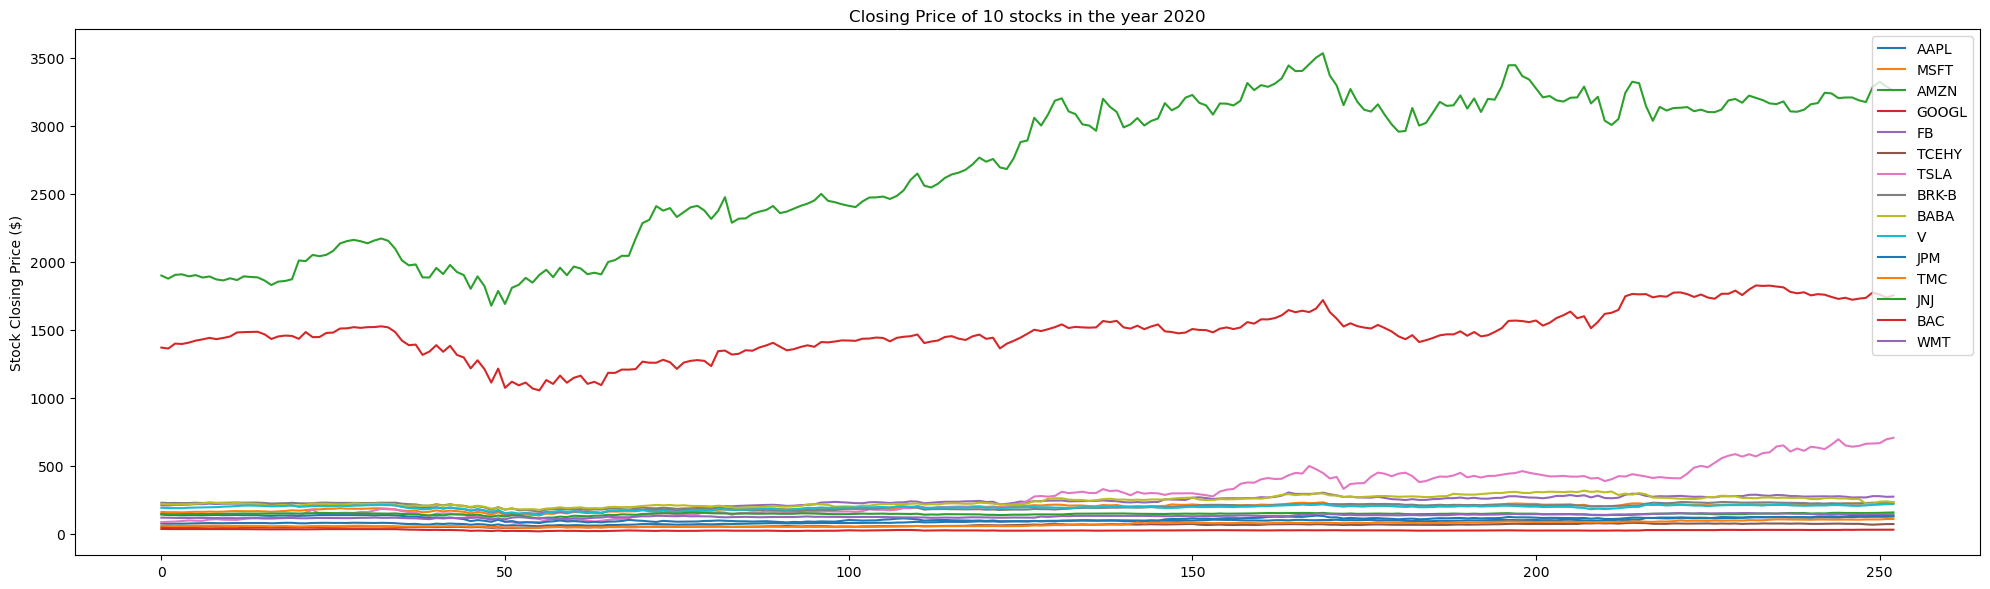

In [4]:
using PyPlot

color = "0.1"
fig = figure(figsize = (20, 6))
# date = ["2020-01-01", "2020-04-01", "2020-07-01", "2020-10-01", "2020-01-01", "2020-12-31"]
# plot(closing_price_matrix[1,:], label = "AAPL", color = "blue")
# plot(closing_price_matrix[2,:], label = "MSFT", color = "red")
for i in 1:15
    plot(closing_price_matrix[i,:], label = stocks[i])
end
legend()
ylabel("Stock Closing Price (\$)")
title("Closing Price of 10 stocks in the year 2020")
tight_layout()

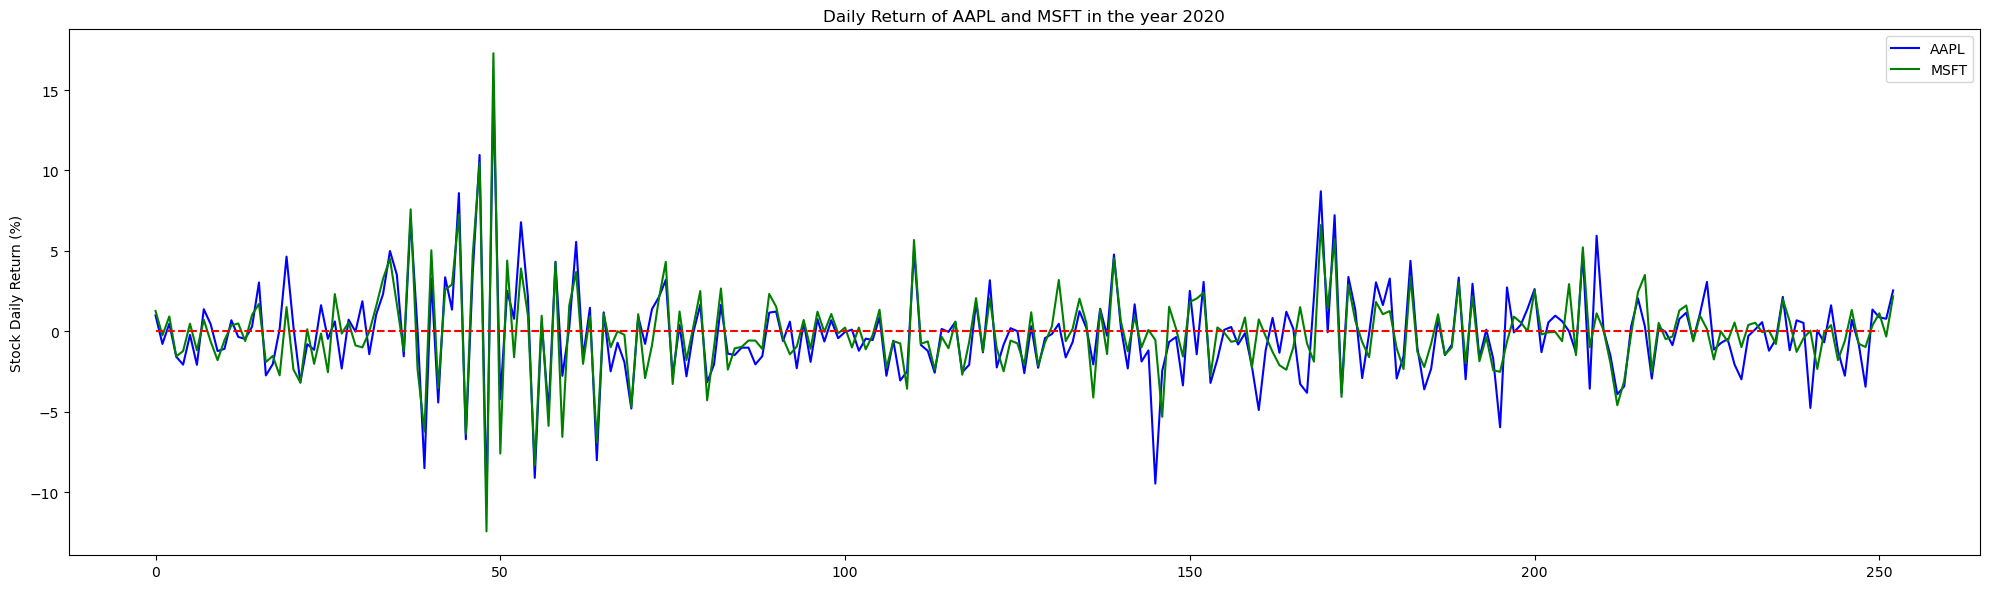

In [5]:
using PyPlot

fig = figure(figsize = (20,6))

plot(daily_return_matrix[1,:], label = "AAPL", color = "blue")
plot(daily_return_matrix[2,:], label = "MSFT", color = "green")
plot([0,250],[0,0],"r--")
legend()
ylabel("Stock Daily Return (%)")
title("Daily Return of AAPL and MSFT in the year 2020")
tight_layout()

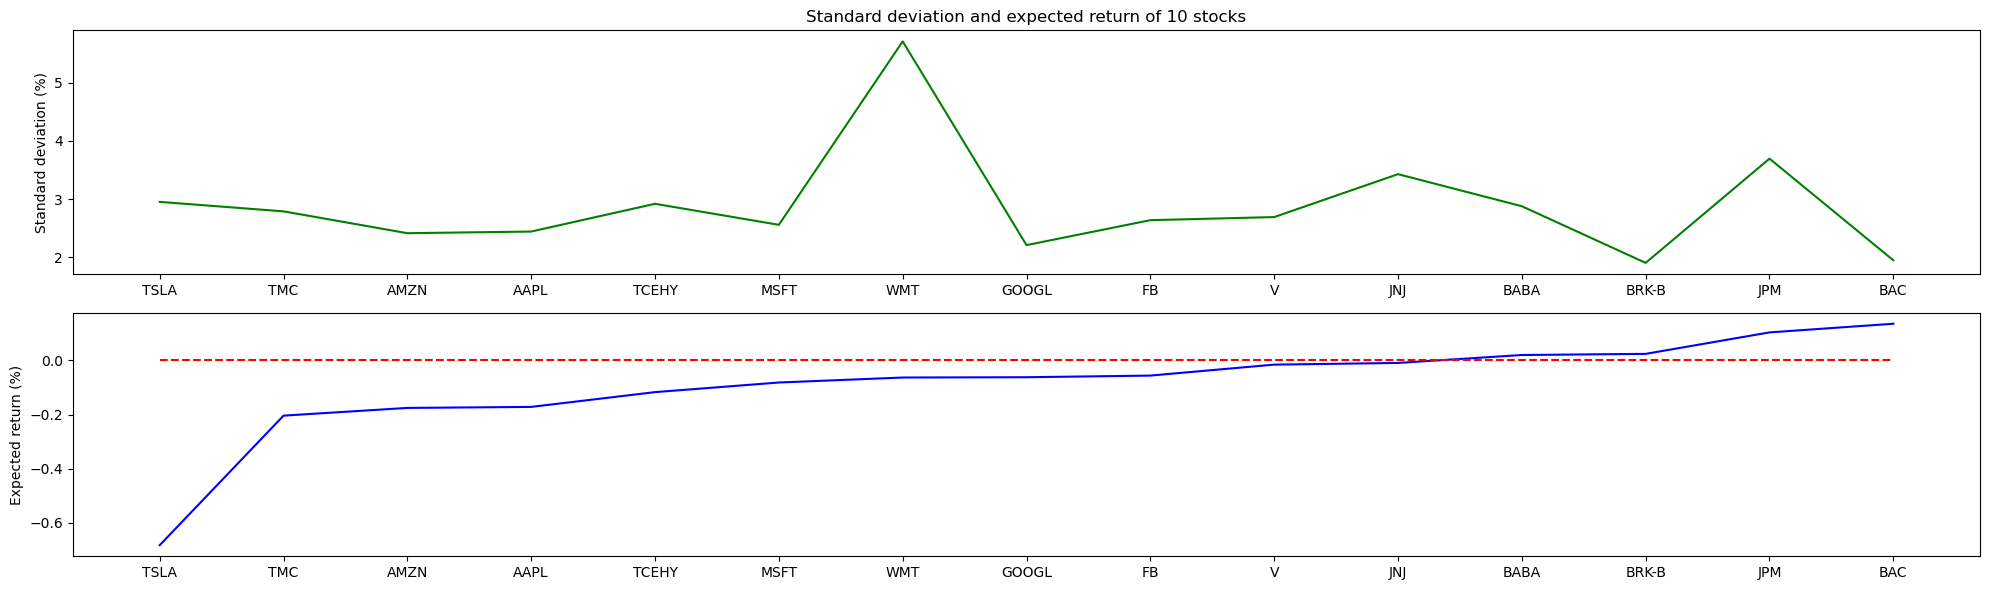

In [6]:
using PyPlot, LinearAlgebra
fig = figure(figsize = (20,6))

subplot(211)
# xlim(0,225)
plot(stocks[sortperm(μ)], sqrt.(diag(Σ)), color = "green")
ylabel("Standard deviation (%)")
title("Standard deviation and expected return of 10 stocks")
tight_layout()

subplot(212)
# xlim(0,12)
plot(stocks[sortperm(μ)], μ[sortperm(μ)], color = "blue")
plot([0,14],[0,0],"r--")
ylabel("Expected return (%)")
tight_layout()

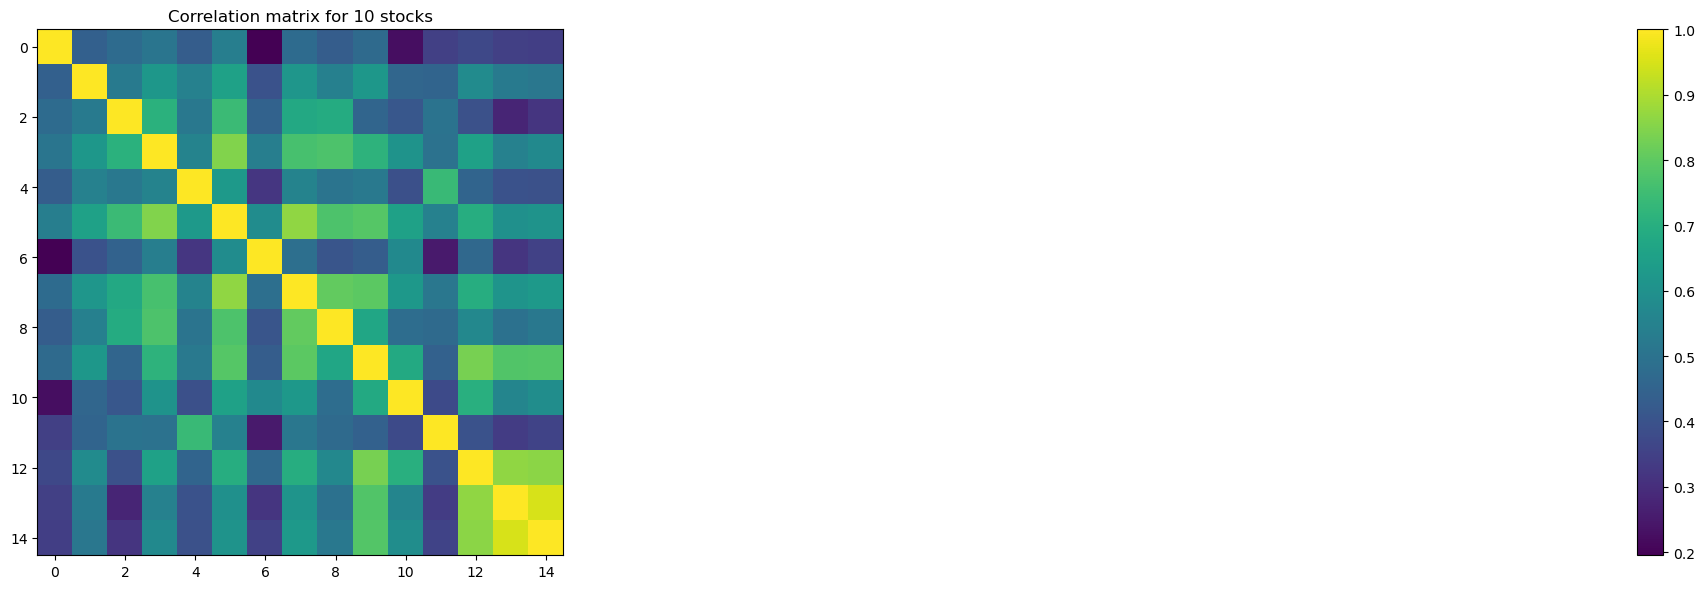

In [7]:
fig = figure(figsize = (30,6))
corr = cor(daily_return_matrix, dims = 2)
imshow(corr[sortperm(μ), sortperm(μ)]); 
colorbar();
axis("image")
title("Correlation matrix for 10 stocks")
tight_layout()

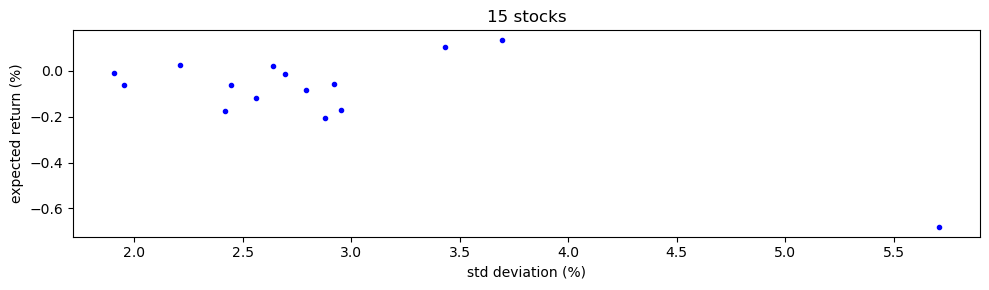

In [8]:
# plot each stock individually
figure(figsize = (10,3))
plot(sqrt.(diag(Σ)), μ, "b.")
xlabel("std deviation (%)")
ylabel("expected return (%)")
title("15 stocks")
tight_layout()
#savefig("folio3_assets.pdf")
;

Before our trading starts, we are holding \$ 100 initially on each stocks listed above:

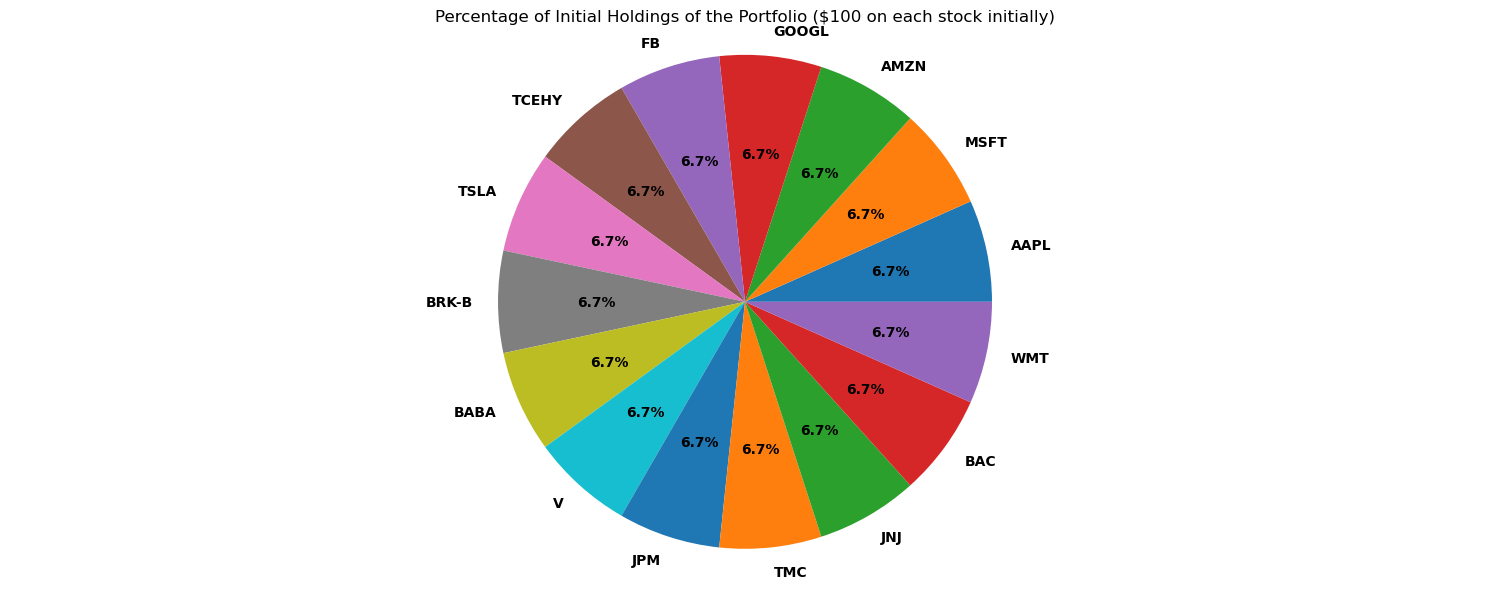

In [9]:
using PyPlot

initial_holding = [100, 100, 100, 100, 100, 100, 100, 100, 
                    100, 100, 100, 100, 100, 100, 100]

explode = zeros(length(stocks))

font = Dict("fontname"=>"Sans","weight"=>"semibold")

###############
#  Pie Chart  #
###############
fig = figure("pyplot_piechart", figsize = (15, 6))
p = PyPlot.pie(initial_holding,
		labels = stocks,
		shadow = false,
		explode = explode,
		autopct = "%1.1f%%",
		textprops = font)

axis("equal")
PyPlot.title("Percentage of Initial Holdings of the Portfolio (\$100 on each stock initially)")
tight_layout()

### 3.2 Model without Considering the Fixed but Linear Cost and Other Common Constraints ###

We first consider a most intuitive model with linear cost, whose objective function is to maximize the total wealth of the portfolio at the end of this trading period. For the transaction cost (mainly the brokerage fee), we only consider the fixed case (i.e. the transaction costs is proportional cost to the total traded amount). 

In [10]:
# First Model considering the linear cost and maximizing total wealth

using JuMP, Ipopt, Gurobi, Statistics, Distributions

# The brokerage rate is based on the market’s customary standards
# We simply choose a reasonable rate but different for long and short operation
long_brokerage_rate = 0.001
short_brokerage_rate = 0.0015

# We assume here that the original positions are evenly distributed, that is, 
# the holding amount of each stock is the same. Here we assume that each stock holds 100 US dollars, 
# so the value of our entire portfolio is 15 * 100 = 1500 US dollars.
initial_holding = [100, 100, 100, 100, 100, 100, 100, 100, 
                    100, 100, 100, 100, 100, 100, 100]

m = Model(with_optimizer(Gurobi.Optimizer, OutputFlag = 0))

# Define 15 nonnegative variables to represent the amount of longing of each stock 
@variable(m, long[1:15] >= 0)
# Define 15 nonnegative variables to represent the amount of shorting of each stock 
@variable(m, short[1:15] >= 0)

# feasible portfolio constraint
# for i in 1:15
#      @constraint(m, (initial_holding+long-short)[i] >= 0)
# end


# Diversification Constraints
# The most direct way to make the portfolio diversified is to limit 
# the proportion of the total investment of a certain industrial sector to the total portfolio

# Here we introduce 3 sector index parameters to indicate 3 different industries.
# The categories of each stock is based on the info from Yahoo Finance
financial_sector_index = [8, 10, 11, 14]
technology_sector_index = [1, 2, 12]
communication_sector_index = [4, 5, 6]

# stocks belonging to financial service sector must make up more than 30%
@constraint(m, sum((initial_holding + long - short)[financial_sector_index]) 
                    >= 0.3*sum(initial_holding + long - short))

# stocks belonging to technology sector must make up less than 20%
@constraint(m, sum((initial_holding + long - short)[technology_sector_index]) 
                    <= 0.2*sum(initial_holding + long - short))

# stocks belonging to communication service sector must make up less than 30%
@constraint(m, sum((initial_holding + long - short)[communication_sector_index]) 
                    <= 0.3*sum(initial_holding + long - short))


# Shortselling Constraint
# This can also be rewritten as a set of linear constraints 
# by introducing 15 auxiliary nonnegative variables t
@variable(m, t[1:15] >= 0)
# we may set a universal upper bound s = 500 
# on the total shortselling permitted in the whole portfolio
@constraint(m, sum(t) <= 500)
for i in 1:15
    @constraint(m, t[i] >= -(initial_holding[i] + long[i] - short[i]))
end

# Shortfall Risk Constraint
# Compute the value of Φ^(-1)(η) by using the Distributions Package
# Here η is the confidence level that we want to make sure 
# the probability that the total value of the portfolio is larger than
# some threshold value W_low is greater than η, here we set η = 0.9,
# This is a common parameter that can be adjusted by portfolio manager
η = 0.8
Φ_inverse = quantile(Normal(), η)
# The reason why we did not apply this constraint will be discussed in the Discussion section later.

# @constraint(m, Φ_inverse^2 * (initial_holding + long - short)'*Σ*(initial_holding + long - short) 
#             .<= (sum(μ[i] * (initial_holding + long - short)[i] 
#             for i in 1:length(stocks)) - 5000)^2)

# Variance Constraint
# We choose to ignore the variance constraint here, reason will be discussed later
max_variance = 100000000
@constraint(m, (initial_holding + long - short)'*Σ*(initial_holding + long - short) <= max_variance)

# Budget Constraint
@constraint(m, sum(long - short) + sum(long_brokerage_rate.*long + short_brokerage_rate.*short) <= 0)

@objective(m, Max, 0.01*(μ .+ 100)'*(initial_holding + long - short))
optimize!(m)

opt_long = value.(long)
opt_short = value.(short)

println("The total value of this portfolio at the end of current trading period is \$", objective_value(m))

# Calculate the position of the current portfolio
post_holding = initial_holding + opt_long - opt_short

# The solver sometimes generates a sufficiently small number
# to represent zero, so we round these values to be zero directly
# to better visualize the result later.
for i in 1:15
    if post_holding[i] < 0.001
        post_holding[i] = 0
    end
end

total_wealth_LinearCost = objective_value(m)
post_holding_LinearCost = post_holding

Academic license - for non-commercial use only - expires 2021-06-16
The total value of this portfolio at the end of current trading period is $1502.2596888264954


15-element Array{Float64,1}:
    0.0
   99.99999932325426
    0.0
   99.999999986429
   99.99999993015282
    0.0
    0.0
  100.00000000543257
   99.99999999675325
   99.9999999717439
  100.00000014458688
    0.0
   99.99999997874993
 1097.5024682830065
   99.99999540136751

### 3.3 Model with Considering the Fixed + Linear Cost, and Other Common Constraints ###

After the first model, we now consider a slightly modified model with fixed cost, whose objective function is still to maximize the total wealth of the portfolio at the end of this trading period. For the transaction cost (mainly the brokerage fee), we only consider the fixed + linear case (i.e. the transaction costs consists of a certain amount of fixed cost once the transaction is completed, plus a proportional cost to the total traded amount). 

In [11]:
# First Model considering the linear cost and maximizing total wealth

using JuMP, Ipopt, Gurobi, Statistics, Distributions

# The brokerage rate is based on the market’s customary standards
# We simply choose a reasonable rate but different for long and short operation
long_brokerage_rate = 0.001
short_brokerage_rate = 0.0015

# We assume here that the original positions are evenly distributed, that is, 
# the holding amount of each stock is the same. Here we assume that each stock holds 100 US dollars, 
# so the value of our entire portfolio is 15 * 100 = 1500 US dollars.
initial_holding = [100, 100, 100, 100, 100, 100, 100, 100, 
                    100, 100, 100, 100, 100, 100, 100]

m = Model(with_optimizer(Gurobi.Optimizer, OutputFlag = 0))

# Define 15 nonnegative variables to represent the amount of longing of each stock 
@variable(m, long[1:15] >= 0)
# Define 15 nonnegative variables to represent the amount of shorting of each stock 
@variable(m, short[1:15] >= 0)

# feasible portfolio constraint
# for i in 1:15
#      @constraint(m, (initial_holding+long-short)[i] >= 0)
# end


# Diversification Constraints
# The most direct way to make the portfolio diversified is to limit 
# the proportion of the total investment of a certain industrial sector to the total portfolio

# Here we introduce 3 sector index parameters to indicate 3 different industries.
# The categories of each stock is based on the info from Yahoo Finance
financial_sector_index = [8, 10, 11, 14]
technology_sector_index = [1, 2, 12]
communication_sector_index = [4, 5, 6]

# stocks belonging to financial service sector must make up more than 30%
@constraint(m, sum((initial_holding + long - short)[financial_sector_index]) 
                    >= 0.3*sum(initial_holding + long - short))

# stocks belonging to technology sector must make up less than 20%
@constraint(m, sum((initial_holding + long - short)[technology_sector_index]) 
                    <= 0.2*sum(initial_holding + long - short))

# stocks belonging to communication service sector must make up less than 30%
@constraint(m, sum((initial_holding + long - short)[communication_sector_index]) 
                    <= 0.3*sum(initial_holding + long - short))


# Shortselling Constraint
# This can also be rewritten as a set of linear constraints 
# by introducing 15 auxiliary nonnegative variables t
@variable(m, t[1:15] >= 0)
# we may set a universal upper bound s = 500 
# on the total shortselling permitted in the whole portfolio
@constraint(m, sum(t) <= 500)
for i in 1:15
    @constraint(m, t[i] >= -(initial_holding[i] + long[i] - short[i]))
end

# Shortfall Risk Constraint
# Compute the value of Φ^(-1)(η) by using the Distributions Package
# Here η is the confidence level that we want to make sure 
# the probability that the total value of the portfolio is larger than
# some threshold value W_low is greater than η, here we set η = 0.9,
# This is a common parameter that can be adjusted by portfolio manager
η = 0.8
Φ_inverse = quantile(Normal(), η)
# The reason why we did not apply this constraint will be discussed in the Discussion section later.

# @constraint(m, Φ_inverse^2 * (initial_holding + long - short)'*Σ*(initial_holding + long - short) 
#             .<= (sum(μ[i] * (initial_holding + long - short)[i] 
#             for i in 1:length(stocks)) - 5000)^2)

# Variance Constraint
# We choose to ignore the variance constraint here, reason will be discussed later
max_variance = 100000000
@constraint(m, (initial_holding + long - short)'*Σ*(initial_holding + long - short) <= max_variance)

# Fixed brokerage cost Constraint
# Introduce 30 binary variables to represent if the fixed cost is incurred
@variable(m, z_long[1:15], Bin)
@variable(m, z_short[1:15], Bin)

fixed_brokerage = 5.0

@constraint(m, long .<= 1500*z_long)  
@constraint(m, short .<= 1500*z_short)

@expression(m, fixed_cost, (sum(z_long) + sum(z_short)) * fixed_brokerage)

# Budget Constraint
@constraint(m, sum(long - short) + sum(long_brokerage_rate.*long + short_brokerage_rate.*short) + fixed_cost <= 0)

@objective(m, Max, 0.01*(μ .+ 100)'*(initial_holding + long - short))
optimize!(m)

opt_long = value.(long)
opt_short = value.(short)

println("The total value of this portfolio at the end of current trading period is \$", objective_value(m))

# Calculate the position of the current portfolio
post_holding = initial_holding + opt_long - opt_short

# The solver sometimes generates a sufficiently small number
# to represent zero, so we round these values to be zero directly
# to better visualize the result later.
for i in 1:15
    if post_holding[i] < 0.001
        post_holding[i] = 0
    end
end

total_wealth_FixedCost = objective_value(m)
post_holding_FixedCost = post_holding

Academic license - for non-commercial use only - expires 2021-06-16
The total value of this portfolio at the end of current trading period is $1489.1759029475352


15-element Array{Float64,1}:
  99.99999999988579
 100.0
 100.0
 100.0
 100.0
 100.0
 100.0
 100.0
 100.0
 100.0
 100.0
   0.0
 100.0
 688.5114885116013
 100.0

### 3.4 Model with Considering Minimizing the Total Transaction Costs (Objective Function) ###

For our third model, we consider a related problem. It is intuitive that every transaction will triger some additional transaction costs like brokerage fee and tax. So some customers may require their managers to maintain a lowest expected return while reducing the overall number of transactions to minimize the lost. So here we introduce a new problem by simply changing the objective function from maximizing total wealth to minimizing the total transaction costs, but we also need to introduce a new constraint to keep a satisfactory level of expected return.

In [12]:
# Third Model considering changing the objective function from maximizing total wealth
# to minimizing the total transaction costs

using JuMP, Ipopt, Gurobi, Statistics, Distributions

# The brokerage rate is based on the market’s customary standards
# We simply choose a reasonable rate but different for long and short operation
long_brokerage_rate = 0.001
short_brokerage_rate = 0.0015

# We assume here that the original positions are evenly distributed, that is, 
# the holding amount of each stock is the same. Here we assume that each stock holds 100 US dollars, 
# so the value of our entire portfolio is 15 * 100 = 1500 US dollars.
initial_holding = [100, 100, 100, 100, 100, 100, 100, 100, 
                    100, 100, 100, 100, 100, 100, 100]

m = Model(with_optimizer(Gurobi.Optimizer, OutputFlag = 0))

# Define 15 nonnegative variables to represent the amount of longing of each stock 
@variable(m, long[1:15] >= 0)
# Define 15 nonnegative variables to represent the amount of shorting of each stock 
@variable(m, short[1:15] >= 0)

# feasible portfolio constraint
# for i in 1:15
#      @constraint(m, (initial_holding+long-short)[i] >= 0)
# end


# Diversification Constraints
# The most direct way to make the portfolio diversified is to limit 
# the proportion of the total investment of a certain industrial sector to the total portfolio

# Here we introduce 3 sector index parameters to indicate 3 different industries.
# The categories of each stock is based on the info from Yahoo Finance
financial_sector_index = [8, 10, 11, 14]
technology_sector_index = [1, 2, 12]
communication_sector_index = [4, 5, 6]

# stocks belonging to financial service sector must make up more than 30%
@constraint(m, sum((initial_holding + long - short)[financial_sector_index]) 
                    >= 0.3*sum(initial_holding + long - short))

# stocks belonging to technology sector must make up less than 20%
@constraint(m, sum((initial_holding + long - short)[technology_sector_index]) 
                    <= 0.2*sum(initial_holding + long - short))

# stocks belonging to communication service sector must make up less than 30%
@constraint(m, sum((initial_holding + long - short)[communication_sector_index]) 
                    <= 0.3*sum(initial_holding + long - short))


# Shortselling Constraint
# This can also be rewritten as a set of linear constraints 
# by introducing 15 auxiliary nonnegative variables t
@variable(m, t[1:15] >= 0)
# we may set a universal upper bound s = 500 
# on the total shortselling permitted in the whole portfolio
@constraint(m, sum(t) <= 500)
for i in 1:15
    @constraint(m, t[i] >= -(initial_holding[i] + long[i] - short[i]))
end

# Shortfall Risk Constraint
# Compute the value of Φ^(-1)(η) by using the Distributions Package
# Here η is the confidence level that we want to make sure 
# the probability that the total value of the portfolio is larger than
# some threshold value W_low is greater than η, here we set η = 0.9,
# This is a common parameter that can be adjusted by portfolio manager
η = 0.8
Φ_inverse = quantile(Normal(), η)
# The reason why we did not apply this constraint will be discussed in the Discussion section later.

# @constraint(m, Φ_inverse^2 * (initial_holding + long - short)'*Σ*(initial_holding + long - short) 
#             .<= (sum(μ[i] * (initial_holding + long - short)[i] 
#             for i in 1:length(stocks)) - 5000)^2)

# Variance Constraint
# We choose to ignore the variance constraint here, reason will be discussed later
max_variance = 100000000
@constraint(m, (initial_holding + long - short)'*Σ*(initial_holding + long - short) <= max_variance)

# Fixed brokerage cost Constraint
# Introduce 30 binary variables to represent if the fixed cost is incurred
@variable(m, z_long[1:15], Bin)
@variable(m, z_short[1:15], Bin)

fixed_brokerage = 5.0

@constraint(m, long .<= 1500*z_long)  
@constraint(m, short .<= 1500*z_short)

@expression(m, fixed_cost, (sum(z_long) + sum(z_short)) * fixed_brokerage)

# Budget Constraint
@constraint(m, sum(long - short) + sum(long_brokerage_rate.*long + short_brokerage_rate.*short) + fixed_cost <= 0)


# Add a expected return constraint because we change the objective function  of this model 
# from maximizing the total wealth to minimzing the total transaction costs
@constraint(m, 0.01*(μ .+ 100)'*(initial_holding + long - short) >= 1480)

# Here we revise the objective function to minimize the total transaction costs:
@objective(m, Min, (sum(long_brokerage_rate.*long + short_brokerage_rate.*short) + fixed_brokerage))
optimize!(m)

opt_long = value.(long)
opt_short = value.(short)


println("The total value of this portfolio at the end of current trading period is \$", 
        0.01*(μ.+100)'*(initial_holding + opt_long - opt_short))
println("The total cost of necessary transactions to adjust the portfolio to the optimal status is \$", 
        objective_value(m))

# Calculate the position of the current portfolio
post_holding = initial_holding + opt_long - opt_short

# The solver sometimes generates a sufficiently small number
# to represent zero, so we round these values to be zero directly
# to better visualize the result later.
for i in 1:15
    if post_holding[i] < 0.001
        post_holding[i] = 0
    end
end

total_wealth_TransCosts = 0.01*(μ.+100)'*(initial_holding + opt_long - opt_short)
post_holding_TransCosts = post_holding

Academic license - for non-commercial use only - expires 2021-06-16
The total value of this portfolio at the end of current trading period is $1488.6205399158757
The total cost of necessary transactions to adjust the portfolio to the optimal status is $5.1325994495871905


15-element Array{Float64,1}:
  42.90718038528897
 100.0
 100.0
 100.0
 100.0
 100.0
 100.0
 146.96022016512384
 100.0
 100.0
 100.0
 100.0
 100.0
 100.0
 100.0

## 4. Results and discussion ##

### 4.1 Results and Discussion for the First Model ###
##### Model without Considering the Fixed but Linear Cost and Other Common Constraints #####

For this model, after multiple trials, we finally decided to discard the shortfall risk constraint because this constraint significantly decrease our end of current single-period wealth $W$ which results in a dramatic loss in our investment portfolio. Shortfall risk constraint is for setting the wealth $W$ with a positive lower bound $W_{low}$ to avoid the market declining or the black swan event. However, this constraint also limits the shortselling strategy in our model at the same time. Shortselling strategy allows a temporary negative holding when the portfolio manager believe the price will decline (negative rate of return), which contradicts with the shortfall risk constraint. This is also a limitation of this model where we don't blance shortfall risk constraint and shortselling constraint so we have to make some trade off.

All of the stock closing price data is acquired besed on the whole year 2020 where stock market is significantly influenced by COVID-19 pandemic. As we can see from the graph shown below, only 4 out of 15 stocks have positive expected daily return. Therefore, our model will automatically prefer to choose to short sell for these stocks with negative daily return.

By eliminating the shortfall risk constraint in this model, we would be able to end up with a better end of period wealth value \$1502.26 which is higher than the wealth before transaction.

As we can see from the pie chart shown below, we put over a half weights on "BAC", the stock of highest expected daily return, which intuitively makes sense.

The holdings of the portfolio after adjustment is 

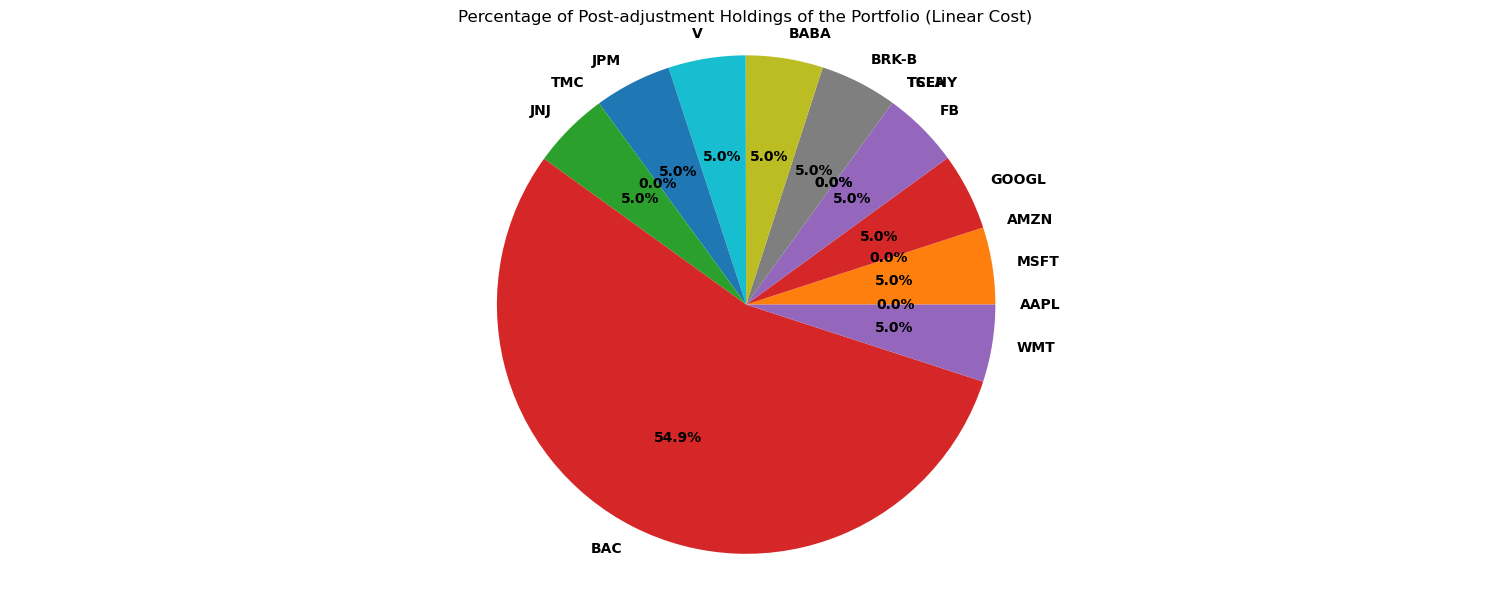

[0.0, 99.99999932325426, 0.0, 99.999999986429, 99.99999993015282, 0.0, 0.0, 100.00000000543257, 99.99999999675325, 99.9999999717439, 100.00000014458688, 0.0, 99.99999997874993, 1097.5024682830065, 99.99999540136751]

The total cost of necessary transactions to adjust the portfolio to the optimal status is $1502.2596888264954


In [13]:
explode = zeros(length(stocks))
font = Dict("fontname"=>"Sans","weight"=>"semibold")

###############
#  Pie Chart  #
###############
fig = figure("pyplot_piechart", figsize = (15, 6))
p = PyPlot.pie(post_holding_LinearCost,
		labels = stocks,
		shadow = false,
		explode = explode,
		autopct = "%1.1f%%",
		textprops = font)

axis("equal")
PyPlot.title("Percentage of Post-adjustment Holdings of the Portfolio (Linear Cost)")
tight_layout()

println("The holdings of the portfolio after adjustment is ", post_holding_LinearCost)
println()
println("The total cost of necessary transactions to adjust the portfolio to the optimal status is \$", 
        total_wealth_LinearCost)

### 4.2 Results and Discussion for the Second Model ###
##### Model with Considering the Fixed + Linear Cost, and Other Common Constraints #####

For this model, we introduce binary variable to represent if the fixed cost is icurred so that the fixed brokerage cost constraint can be handled properly. As we discussed in the first model section, we choose not to use the shortfall risk constraint in this model as well for the same reason as before.

By adding the additional fixed brokerage cost constraint, we eventually end up with a end of period wealth value \$1489.18, which is lower than the wealth before transaction. This result can be attributed to the added fixed brokerage cost ocuring in each trasaction. Moreover, given that only 4 out of 15 stocks have positive expected daily return mainly due to COVID-19 pandemic, it is extremely difficult for our model to make profit in the trading in this situation.

As we can see from the pie chart shown below, we put highest weight (34.6\%) on "BAC", the stock of highest expected daily return, and put nearly equal weight on the rest stocks except for "TMC".

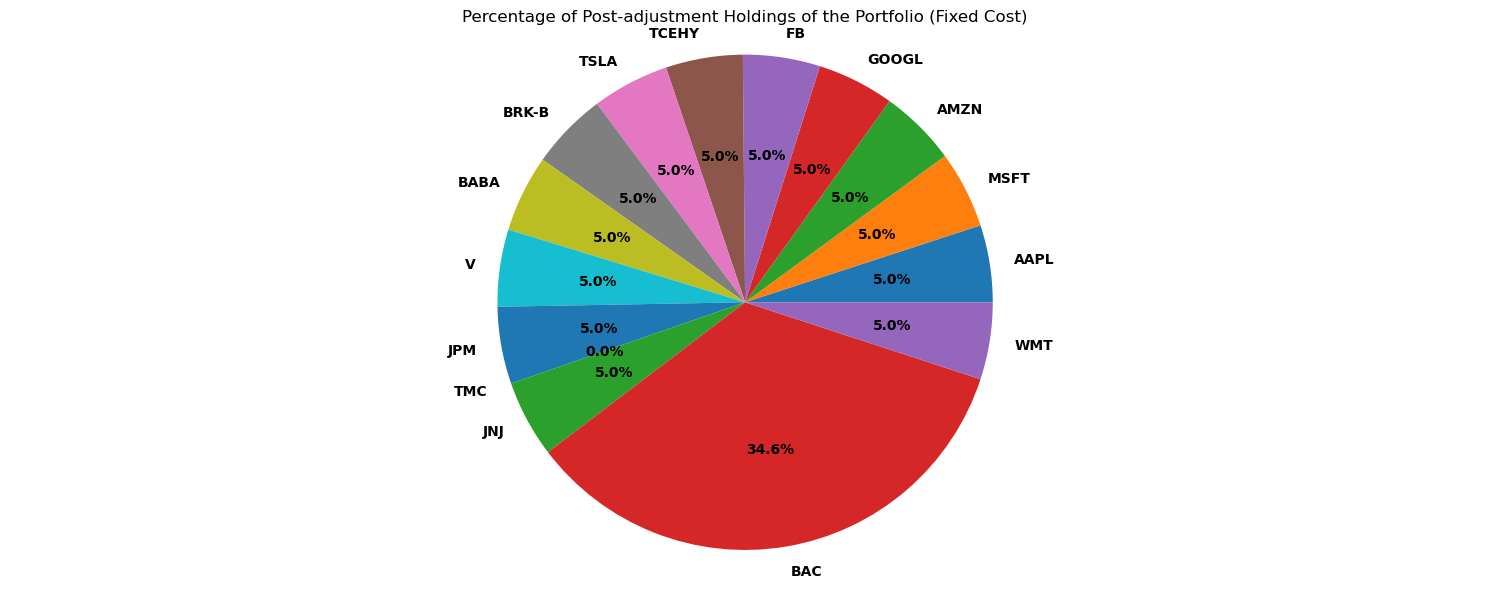

The holdings of the portfolio after adjustment is [99.99999999988579, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 0.0, 100.0, 688.5114885116013, 100.0]

The total cost of necessary transactions to adjust the portfolio to the optimal status is $1489.1759029475352


In [14]:
explode = zeros(length(stocks))
font = Dict("fontname"=>"Sans","weight"=>"semibold")

###############
#  Pie Chart  #
###############
fig = figure("pyplot_piechart",figsize = (15, 6))
p = PyPlot.pie(post_holding_FixedCost,
		labels = stocks,
		shadow = false,
		explode = explode,
		autopct = "%1.1f%%",
		textprops = font)

axis("equal")
PyPlot.title("Percentage of Post-adjustment Holdings of the Portfolio (Fixed Cost)")
tight_layout()

println("The holdings of the portfolio after adjustment is ", post_holding_FixedCost)
println()
println("The total cost of necessary transactions to adjust the portfolio to the optimal status is \$", 
        total_wealth_FixedCost)

### 4.3 Results and Discussion for the Third Model ###
##### Model with Considering Minimizing the Total Transaction Costs (Objective Function) #####

For this model, we try to minimize the total transaction costs as our objective function. We also keep the fixed brokerage cost constraint as the second model. As we discussed in the first model section, we choose not to use the shortfall risk constraint in this model as well for the same reason as before. And we add a expected return constraint where the end of period wealth value is set to be greater than or equal to \$1480. we choose to set a value lower than initial wealth because we consider that 11 out of 15 stocks have negative expected daily return and fixed transaction cost also significantly decrease the end of period wealth. It is good enough for the model to maintain less loss for the wealth in the stock market under this difficult situation.

We eventually end up with a end of period wealth value \$1488.62, which is higher than the expected value in the expected return constraint. This end of period wealth value is very close to the one in the second model. Although these two model have different objective function, it turns out that they achieve close end of period wealth value.

As we can see from the pie chart shown below, this time there is no dominant stock in our portfolio. Most stock take a nearly equal weight except for "BRK-B" and "AAPL".

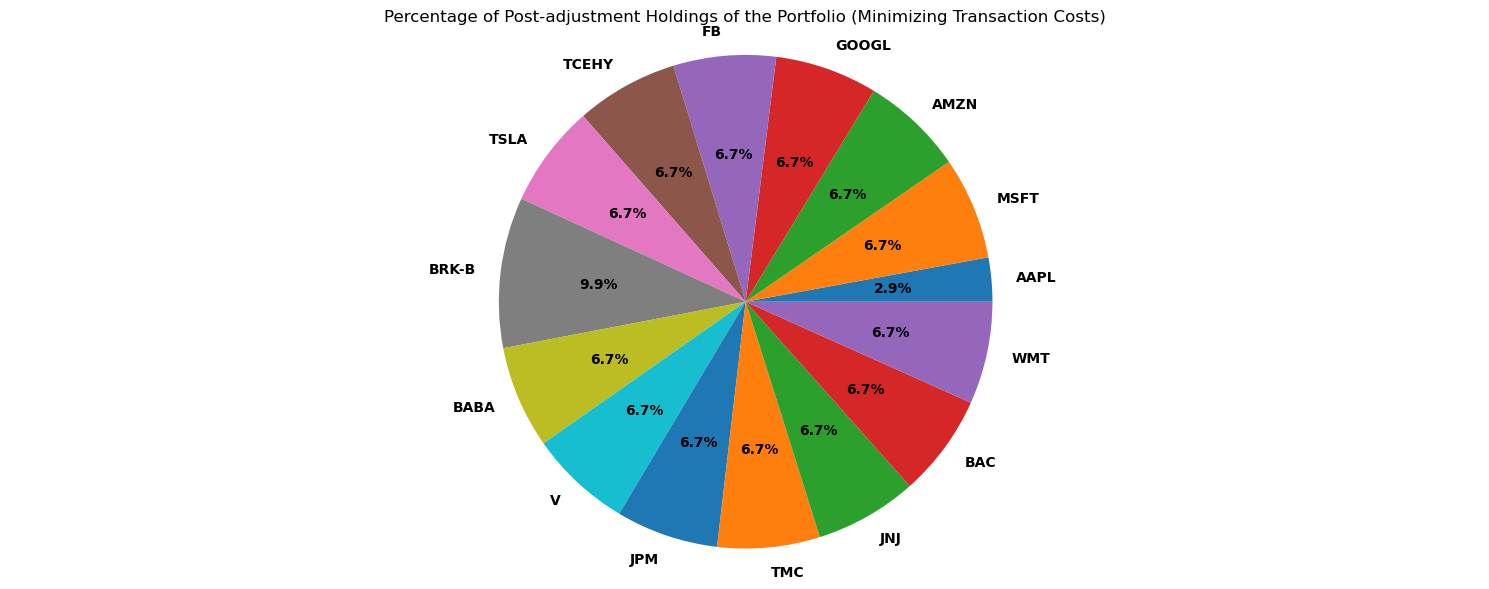

The holdings of the portfolio after adjustment is [42.90718038528897, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 146.96022016512384, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]

The total cost of necessary transactions to adjust the portfolio to the optimal status is $1488.6205399158757


In [15]:
explode = zeros(length(stocks))
font = Dict("fontname"=>"Sans","weight"=>"semibold")

###############
#  Pie Chart  #
###############
fig = figure("pyplot_piechart",figsize = (15, 6))
p = PyPlot.pie(post_holding_TransCosts,
		labels = stocks,
		shadow = false,
		explode = explode,
		autopct = "%1.1f%%",
		textprops = font)

axis("equal")
PyPlot.title("Percentage of Post-adjustment Holdings of the Portfolio (Minimizing Transaction Costs)")
tight_layout()

println("The holdings of the portfolio after adjustment is ", post_holding_TransCosts)
println()
println("The total cost of necessary transactions to adjust the portfolio to the optimal status is \$", 
        total_wealth_TransCosts)

## 5. Conclusion ##

This portfolio optimization project applies optimization techniques to customize the investment portfolio involving more real-world constraints including linear/fixed transaction cost, shortfall risk constraint, shortselling constraint and diversification constraint, variance constraint and budget constraint, etc. Given different appetites of investors and transaction mechanism, we formulate three optimization problems and display the corresponding holding of each stock and total wealth at the end of trading period. Due to the COVID-19 pandemic influence on stock price, we only make little profit and even lose money for some models by using our portfolio. But we still believe our model is well-formulated and rigirous mathematically. All the stock price are derived from all transaction days in 2020 so the result is basically applicable in practice.

We also realize that in the real-world trading, portfolio manager may consider more sophisticated constraints and specific objective function in the optimization model. For example, implementing the shortselling strategy with proper shortfall risk constraint can be a good idea to consider. Besides, there are many assumptions for this model, for example, in the process of formulatin the shortfall risk constraints, we made the assumptions like the end-period wealth is a random variable which follows Gaussain distribution. This may violate the situation in the real trading scene. 

In conclusion, this work hopefully could provide some guidance and details facing the rapid changing financial market. While earning profits from the financial market can never be guanranteed, at least one can know they are doing it optimally.

## 6. Reference ##

Lobo, M. S., Fazel, M., & Boyd, S. (2007). Portfolio Optimization with Linear and Fixed Transaction Costs. *Annals of Operations Research*, 152(1), 341-365.

Skaf, J., & Boyd, S. (2009). Multi-period portfolio optimization with constraints and transaction costs. *Working Manuscript*.